<a href="https://colab.research.google.com/github/Alf-caput/AA_PRACTICA3_GRUPO_4/blob/dev2/aa_practica3_grupo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Grupo 4
### Miguel Egido Morales, Ana Robledano Abasolo, Alfredo Robledano Abasolo
# P3 AA Redes de Neuronas Convolucionales

In [ ]:
!pip install --upgrade tensorflow

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling te

In [ ]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [ ]:
len(x_train)

50000

In [ ]:
'''from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

model1 = Sequential()
#capa1:
model1.add(Conv2D(32, (3, 3), activation='relu',  padding='same',input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu',padding='same'))

model1.add(Flatten())
model1.add(Dense(250, activation='relu'))
model1.add(Dense(100, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
model1.summary()'''

"from tensorflow.keras import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.regularizers import L2\n\nmodel1 = Sequential()\n#capa1:\nmodel1.add(Conv2D(32, (3, 3), activation='relu',  padding='same',input_shape=(32, 32, 3)))\nmodel1.add(Conv2D(32, (3, 3), activation='relu',padding='same'))\n\nmodel1.add(Flatten())\nmodel1.add(Dense(250, activation='relu'))\nmodel1.add(Dense(100, activation='softmax'))\n\nmodel1.compile(loss='sparse_categorical_crossentropy',\n           metrics=['accuracy'])\nmodel1.summary()"

In [ ]:
#history1 = model1.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test), verbose=1)

In [ ]:
'''
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])  # Agrega esta línea
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()'''

"\nimport matplotlib.pyplot as plt\n\nplt.plot(history1.history['accuracy'])\nplt.plot(history1.history['val_accuracy'])  # Agrega esta línea\nplt.title('Model Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.show()"

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model2 = Sequential()
#capa1:
model2.add(Conv2D(32, (3, 3), activation='relu',  padding='same',input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), padding='same' ,activation='relu'))

model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same' ,activation='relu'))
model2.add(Conv2D(64, (3, 3), padding='same' ,activation='relu'))

model2.add(Flatten())
model2.add(Dense(250, activation='relu'))
model2.add(Dense(100, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
#Model checkpoint sirve para guardar el mejor modelo
#para implementar el filepath model2_checkpoint.keras tienes que tener la ultima version de tensorflow (!pip install --upgrade tensorflow)

checkpoint_callback = ModelCheckpoint(filepath='model2_checkpoint.keras', save_best_only=True, monitor='val_accuracy', mode='max')
#sirve para detener el entrenamiento si no hay mejoras en la precisión de validación durante n épocas (patience).
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)



model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                        

In [ ]:
#metemos el argumento callback a fit y estos detendrán el entrenamiento si no ven una mejora en la precisión de validación
# Entrenar el modelo con callbacks
history2 = model2.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test), callbacks=[checkpoint_callback, early_stopping_callback], verbose=1)

Epoch 1/30
782/782 [==============================] - 360s 455ms/step - loss: 3.6849 - accuracy: 0.1435 - val_loss: 3.0980 - val_accuracy: 0.2561
Epoch 2/30
782/782 [==============================] - 340s 434ms/step - loss: 2.7918 - accuracy: 0.3041 - val_loss: 2.6703 - val_accuracy: 0.3352
Epoch 3/30
782/782 [==============================] - 337s 432ms/step - loss: 2.2827 - accuracy: 0.4096 - val_loss: 2.5373 - val_accuracy: 0.3684
Epoch 4/30
782/782 [==============================] - 344s 441ms/step - loss: 1.8459 - accuracy: 0.5068 - val_loss: 2.5977 - val_accuracy: 0.3726
Epoch 5/30
782/782 [==============================] - 338s 432ms/step - loss: 1.3731 - accuracy: 0.6192 - val_loss: 2.8390 - val_accuracy: 0.3699
Epoch 6/30
782/782 [==============================] - 344s 440ms/step - loss: 0.9048 - accuracy: 0.7392 - val_loss: 3.2107 - val_accuracy: 0.3599
Epoch 7/30
782/782 [==============================] - 336s 430ms/step - loss: 0.5143 - accuracy: 0.8459 - val_loss: 4.1407 -

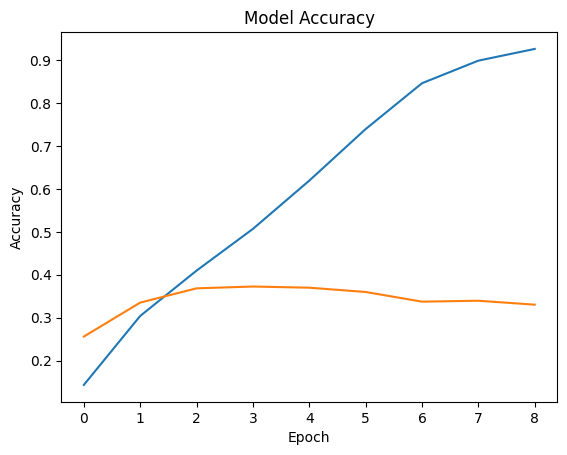

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])  # Agrega esta línea
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
'''#el siguiente es data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)'''

'#el siguiente es data augmentation\nfrom keras.preprocessing.image import ImageDataGenerator\ndatagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)\n# prepare iterator\nit_train = datagen.flow(x_train, y_train, batch_size=64)'

In [ ]:
'''steps = int(x_train.shape[0] / 64)
history3 = model2.fit_generator(it_train, steps_per_epoch=steps, epochs=3, validation_data=(x_test, y_test), verbose=1)'''

'steps = int(x_train.shape[0] / 64)\nhistory3 = model2.fit_generator(it_train, steps_per_epoch=steps, epochs=3, validation_data=(x_test, y_test), verbose=1)'

In [ ]:
'''import matplotlib.pyplot as plt

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])  # Agrega esta línea
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()'''


"import matplotlib.pyplot as plt\n\nplt.plot(history3.history['accuracy'])\nplt.plot(history3.history['val_accuracy'])  # Agrega esta línea\nplt.title('Model Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.show()"